In [1]:
import pandas as pd
import chardet

In [2]:
file='startup data.csv'

In [3]:
dataframe= pd.read_csv(file,encoding='ISO-8859-1')
dataframe.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
dataframe.shape

(923, 49)

In [6]:
dataframe.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [7]:
dataframe.duplicated().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
dataframe['Target']=le.fit_transform(dataframe['status'])
dataframe.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,Target
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,1,0,0,0,0,1.0000,0,acquired,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,1,0,0,1,1,1,4.7500,1,acquired,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,1,0,0,0,4.0000,1,acquired,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,1,1,1,3.3333,1,acquired,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,1,1,0,0,0,0,1.0000,1,closed,1


In [12]:
dataframe['Target'].value_counts()

0    597
1    326
Name: Target, dtype: int64

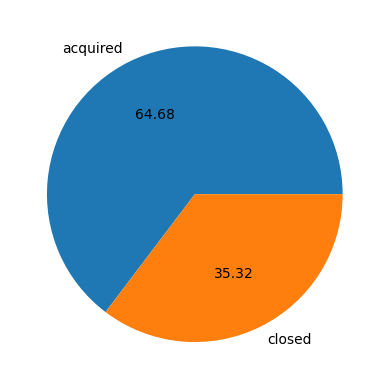

In [13]:
import matplotlib.pyplot as plt
plt.pie(dataframe['Target'].value_counts(),labels=['acquired','closed'],autopct="%0.2f")
plt.show()

In [14]:
dataframe.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Target
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.353196
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,0.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [16]:
#acquire status
dataframe[dataframe['Target']==0].describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Target
count,597.000000,597.000000,597.000000,597.0,597.000000,597.000000,550.000000,550.000000,597.000000,597.000000,...,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.0
mean,555.366834,38.646103,-104.136147,1.0,2.095389,4.093073,3.361397,5.295417,9.644891,2.522613,...,0.308208,0.306533,0.231156,0.576214,0.467337,0.284757,0.130653,3.096093,0.899497,0.0
std,336.299180,3.583188,22.958341,0.0,1.940393,2.530494,2.734593,2.875440,7.793983,1.395670,...,0.462140,0.461440,0.421925,0.494572,0.499350,0.451677,0.337303,1.930897,0.300921,0.0
min,1.000000,25.752358,-122.725662,1.0,-0.498600,-0.413700,-14.169900,-3.750700,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,274.000000,37.396312,-122.276454,1.0,0.580800,2.087700,1.485625,3.097225,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.0
50%,528.000000,37.779281,-121.940842,1.0,1.446600,3.756200,3.000000,5.002700,7.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.666700,1.000000,0.0
75%,854.000000,40.730646,-75.169522,1.0,3.394500,5.690400,5.002700,7.171925,13.000000,3.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.0
max,1153.000000,59.335232,18.057121,1.0,7.537000,11.904100,13.011000,13.586300,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,0.0


In [18]:
#closed status
dataframe[dataframe['Target']==1].describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Target
count,326.000000,326.000000,326.000000,326.0,326.000000,326.000000,221.000000,221.000000,326.000000,326.000000,...,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.0
mean,603.303681,38.281826,-102.446053,0.0,2.492452,3.635489,2.293706,3.408055,4.168712,1.923313,...,0.349693,0.361963,0.297546,0.383436,0.254601,0.138037,0.042945,2.367017,0.644172,1.0
std,326.798103,4.010267,21.313527,0.0,3.297323,3.620816,3.397371,3.595313,4.348553,1.297433,...,0.477606,0.481307,0.457882,0.486970,0.436307,0.345469,0.203044,1.669491,0.479500,0.0
min,4.000000,26.052461,-122.756956,0.0,-9.046600,-9.046600,-7.005500,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,314.500000,37.354469,-122.108732,0.0,0.448600,0.891775,0.063000,0.863000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,635.500000,37.779281,-117.164363,0.0,1.438400,2.719200,1.252100,2.821900,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.0
75%,885.250000,40.729839,-79.925644,0.0,3.827425,5.137650,3.498600,5.183600,5.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.0
max,1147.000000,54.983201,-1.574631,0.0,21.895900,21.895900,24.684900,24.684900,33.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.0


In [20]:
dataframe.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12480\4279439629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()


,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Target
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.135614,-0.131698,-0.079950,-0.118456,...,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,0.068721
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,...,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,-0.046560
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,...,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,0.036092
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.162279,0.265871,0.360434,0.206049,...,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652,-1.000000
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,...,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,...,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,-0.073731
age_first_milestone_year,-0.135614,-0.072000,-0.051674,0.162279,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,...,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329,-0.162279
age_last_milestone_year,-0.131698,-0.054275,-0.087701,0.265871,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,...,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859,-0.265871
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,...,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,-0.360434
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,...,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,-0.206049


C:\Users\Admin\AppData\Local\Temp\ipykernel_12480\4235085271.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(),annot=True)


<Axes: >

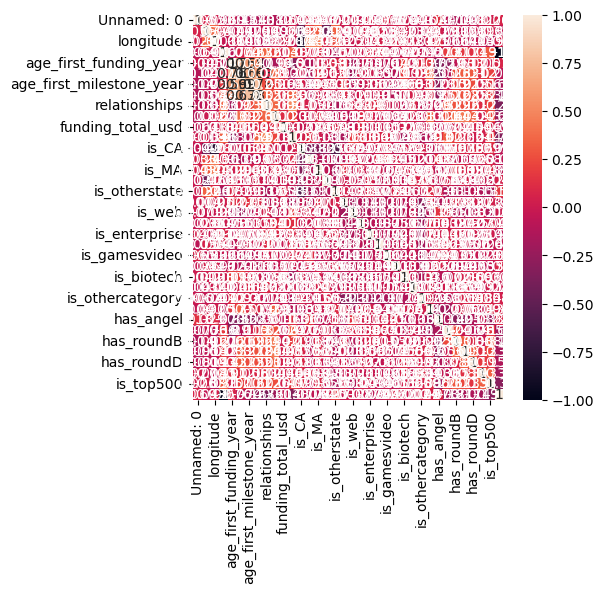

In [22]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(dataframe.corr(),annot=True)